🚀 PROYECTO 1: Consultoría de E-Commerce

Escenario: Una empresa de ropa vende online y también tiene sesiones de asesoramiento en tienda física. Los clientes entran, se prueban ropa y luego pueden comprar por la App Móvil o por la Página Web. Te han contratado para decidir: ¿Deben invertir su dinero en mejorar la App o en mejorar la Web?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Configuración
np.random.seed(101)
n = 500

# Generamos características
# Promedio de duración de la sesión en tienda (minutos)
avg_session = np.random.normal(33, 2, n) 
# Tiempo pasado en la App (minutos)
time_app = np.random.normal(12, 1, n)     
# Tiempo pasado en la Web (minutos)
time_web = np.random.normal(37, 1, n)     
# Años siendo miembro
membership = np.random.normal(4, 1, n)    

# Generamos el Gasto Anual (Target)
# Fórmula secreta: El gasto depende mucho del Membership y la App, poco de la Web
gasto = 200 + (avg_session * 5) + (time_app * 40) + (time_web * 0.5) + (membership * 60) + np.random.normal(0, 20, n)

df_ecommerce = pd.DataFrame({
    'Avg_Session_Length': avg_session,
    'Time_on_App': time_app,
    'Time_on_Website': time_web,
    'Length_of_Membership': membership,
    'Yearly_Amount_Spent': gasto
})

df_ecommerce.head()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,38.413700,12.358151,37.651627,4.920602,1170.122465
1,34.256265,12.020895,36.925219,3.169252,1084.082783
2,34.815939,11.667862,36.615440,3.168637,1067.417221
3,34.007652,13.119649,37.437588,4.111032,1158.875877
4,34.302236,13.270049,36.490943,2.530911,1068.235991


Tus Misiones (Instrucciones)
1) Exploración (Pandas & Seaborn):

    * Usa sns.pairplot(df_ecommerce) para ver todas las relaciones de golpe. ¿Qué gráfico se ve más lineal (una línea recta perfecta) con respecto al Yearly_Amount_Spent?
    * Usa sns.heatmap(df_ecommerce.corr(), annot=True) para ver los números exactos de correlación.

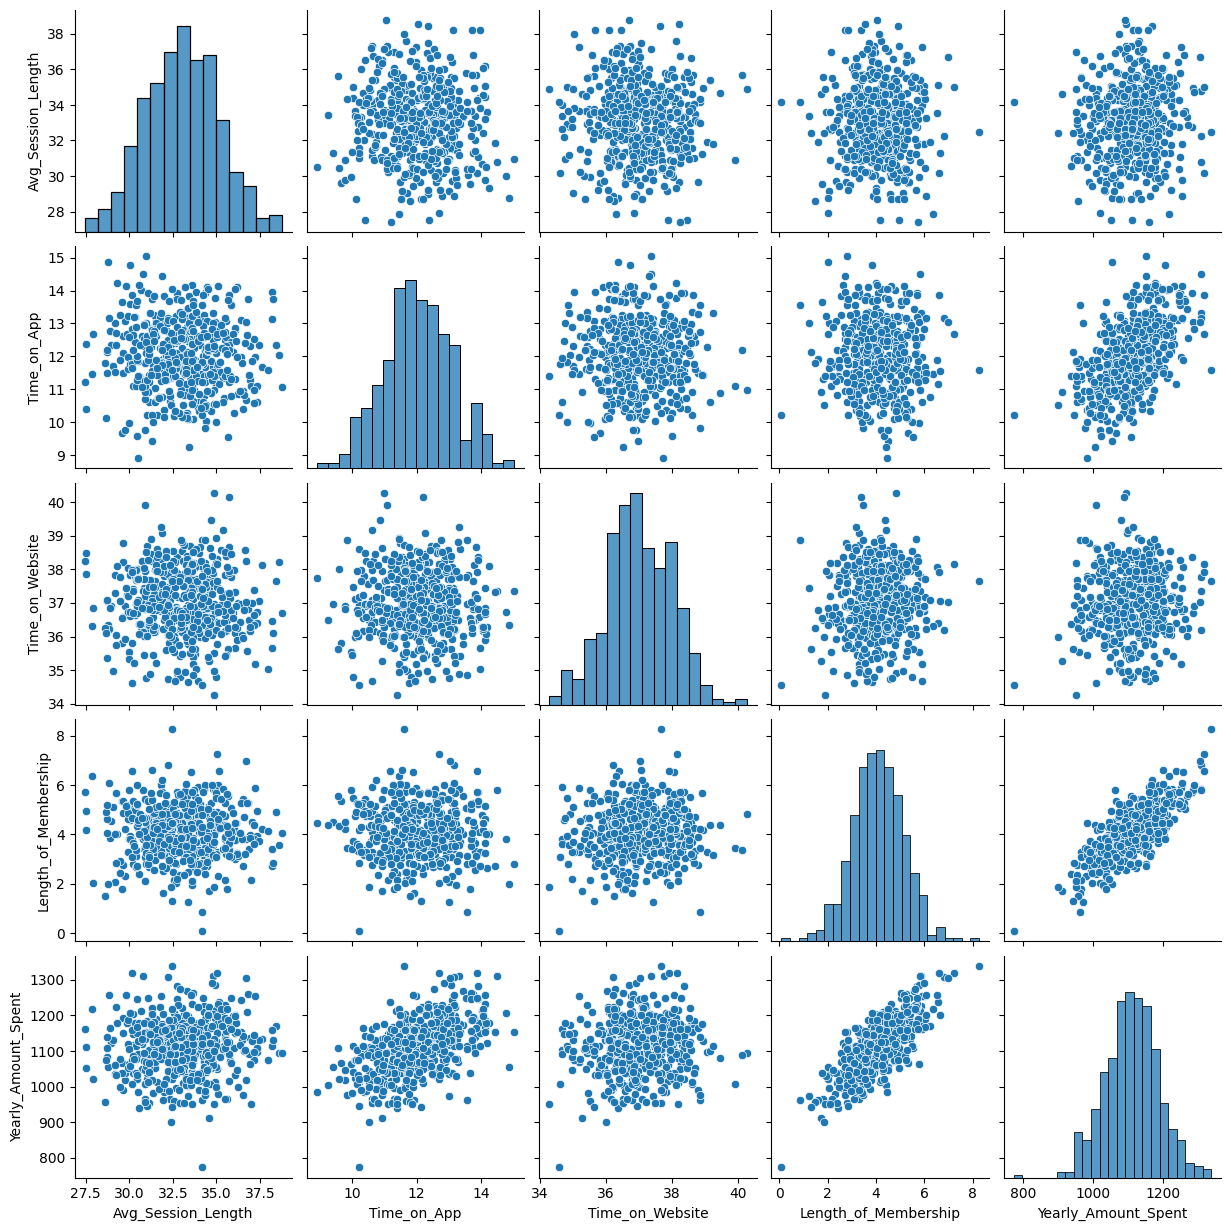

In [ ]:
sns.pairplot(df_ecommerce) #para ver todas las relaciones de golpe
#length of memebership es el mas lineal vs yearly_amount_spent

<Axes: >

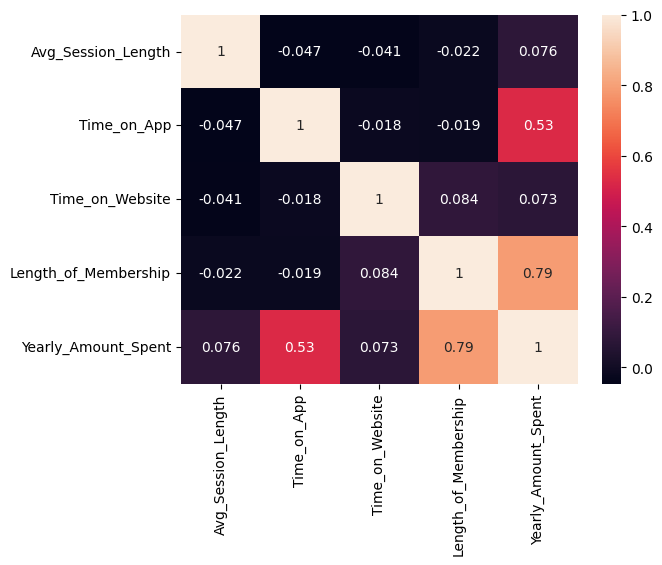

In [4]:
sns.heatmap(df_ecommerce.corr(), annot=True)

2) Modelado (Scikit-Learn):

    * Separa: X son todas las columnas numéricas menos el gasto. y es Yearly_Amount_Spent.
    * Haz el train_test_split (30% test).

In [5]:
X=df_ecommerce[['Avg_Session_Length','Time_on_App','Time_on_Website','Length_of_Membership']]
y=df_ecommerce[['Yearly_Amount_Spent']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

3) Entrena una LinearRegression.

    * La Pregunta del Millón (Interpretación de Coeficientes):
    * Aquí viene lo nuevo. Una vez entrenado el modelo, imprime modelo.coef_.
    * Crea un DataFrame que muestre el nombre de la columna junto a su coeficiente.

El Desafío Conceptual: Los coeficientes te dicen: "Por cada unidad que aumenta X, el gasto aumenta Y dólares". Basado en esos coeficientes... ¿La empresa gana más dinero cuando el usuario pasa 1 minuto más en la App o 1 minuto más en la Web?

In [ ]:
modelo=LinearRegression()
modelo.fit(X_train, y_train)
print(modelo.coef_)

pd.DataFrame(modelo.coef_.T, index=X.columns, columns=['Coeficiente']) 
#modelo.coef_: This attribute holds the estimated coefficients
#modelo.coef_.T la T los traspone

#Interpretación: "Manteniendo todo lo demás fijo, por cada 1 minuto extra que el usuario pasa en la App, gasta 40 dólares más al año. 
# Pero si pasa 1 minuto extra en la Web, solo gasta 0.5 dólares más".

[[ 4.93948872 40.35889269  2.3814153  58.74216679]]


,Coeficiente
Avg_Session_Length,4.939489
Time_on_App,40.358893
Time_on_Website,2.381415
Length_of_Membership,58.742167
